# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Importing libraries and the data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import ttest_1samp
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

#data: columns (temperature, gender, heart_rate)
df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [21]:
#Check for null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## Functions

In [3]:
#========================#
# ecdf function
#========================#

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#========================#
# pearson
#========================#
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]


#========================#
# generate bs replicates
#========================#
def gen_bs_reps(data, func, size=1):
    """Generate bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))

    return bs_replicates


## QUESTION 1: Is the distribution of body temperatures normal?
Conclusion: comparing our data with the theoretical normal distribution shows that our data is normally distibuted.

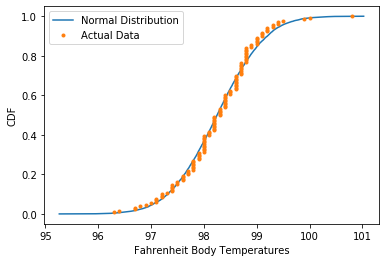

In [4]:
#assign the column of interest to the variable t
t = df.temperature

# Compute mean and standard deviation of our body temperature data: mu, sigma
mu = np.mean(t)
sigma = np.std(t)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(t)

# Plot the theorectical CDF of a normal distribution and our data
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Fahrenheit Body Temperatures')
_ = plt.ylabel('CDF')
_ = plt.legend(('Normal Distribution', 'Actual Data'))

plt.show()

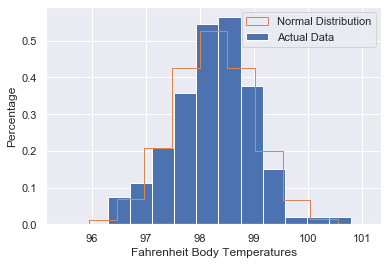

In [9]:
#default style
sns.set()

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(t))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# drawing the plot
plt.hist(t, bins=n_bins, density=True)
plt.hist(samples, bins=n_bins, density=True, histtype="step")

_ = plt.legend(('Normal Distribution', 'Actual Data'))
plt.xlabel("Fahrenheit Body Temperatures")
plt.ylabel("Percentage")
plt.show()

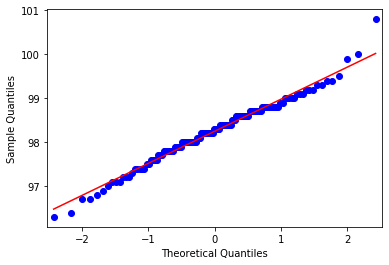

In [6]:
#QQ Plot (s is for standardized line)
_ = qqplot(t, line='s')

## Question 2
Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

## Answer
n = 130,    x-hat ~ 98.25,   std of x ~ .73,   α = 0.05

— n is 130. When sampling with 30 samples at a time (or more) we are left with a very well established normal distribution which is great for a z-test.

— Observations are independent as one person's temperature won't affect the temperature of someone else. Plus, n = 130 is less than 10 percent of the world population.

## Question 3
Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

In [11]:
# random seed
np.random.seed(13)

# one bootstrap sample
bs_sample = np.random.choice(t, len(t))
bs_sample

array([ 97.5,  99. ,  98.3,  98.8,  97.7,  99. ,  98.8,  98.8,  98.5,
        97.8,  98.8,  98.4,  97.8,  96.7,  98.4,  98. ,  98.2,  98.6,
        99.3,  97.8,  97.7,  99. ,  98.7,  97.1,  97.8,  99.1,  97.7,
        97.2,  98. ,  98.6,  98.2,  97.8,  97.3,  98.6,  98.4,  99.2,
        99.3,  97.1,  98.4,  98. ,  98. ,  97.6,  98. ,  97.4,  97.6,
        98. ,  99.1,  97.8,  97.6,  98.6,  97.9,  98.6,  98.2,  98.9,
        99.1,  99.5,  98.3,  98. , 100. ,  99.2,  99.2,  98. ,  98.3,
        98.1,  97.8,  99.1,  98.6,  98.8,  97.6,  96.7,  97.4,  98. ,
        97.9,  98. ,  98.7,  99.1,  98.4,  97.9,  99. ,  98.2, 100.8,
        97.6,  98.4,  99.4,  97.8,  98.1,  99. ,  97.9,  97.8,  97.1,
        98.9,  98.4,  98. ,  98. ,  98.2,  97.8,  98.7,  98.3,  98. ,
        96.8,  97.6,  98.9,  99. ,  98.7,  97.6,  97.6,  99.9,  98. ,
        98. ,  97.8,  99.4,  98. ,  98. ,  98.3,  98.9,  99.9,  97.8,
        98.8,  97.5,  98.5,  98.1,  96.8,  97.2,  98.3,  97.9,  98. ,
        98.6,  97.9,

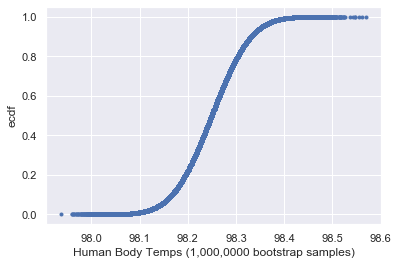

In [12]:
#generate 1,000,000 bs replicates of the mean and plot the ecdf
bs_mean = gen_bs_reps(t, np.mean, 1000000)
bs_x, bs_y = ecdf(bs_mean)
plt.plot(bs_x, bs_y, marker=".", linestyle="none")
plt.xlabel("Human Body Temps (1,000,0000 bootstrap samples)")
plt.ylabel("ecdf")
plt.show()

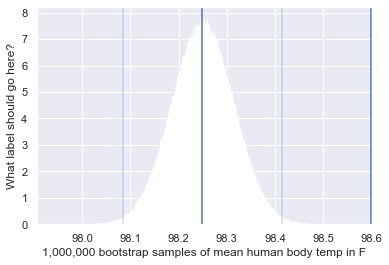

In [14]:
sns.set()

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(bs_mean))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# drawing the plot
plt.hist(bs_mean, bins=n_bins, density=True)
_ = plt.axvline(mu) #mu is the original mean
_ = plt.axvline(98.6)
_ = plt.axvline(np.percentile(bs_mean, 99.5), alpha = .25)
_ = plt.axvline(np.percentile(bs_mean, .5), alpha = .25)


plt.xlabel("1,000,000 bootstrap samples of mean human body temp in F")
plt.ylabel("What label should go here?")
plt.show()

In [15]:
# The mean of our bootstrap replicates
print("BS rep mean:   ", np.mean(bs_mean))
print("BS Standard Dev:", np.std(bs_mean))

#95% confidence interval of our bootstrap-means
print("95% CI:       ", np.percentile(bs_mean, [2.5, 97.5]))

# 99% confidence interval of our bs mean replicates
print("99% CI:       ", np.percentile(bs_mean, [.5, 99.5]))

# the mean of our original data is ~ 98.25
print("Original mean: ", mu)
# 30% of people in the original data had a temp over 98.6
print("Original data with temp over 98.6:", np.sum(t > 98.6) / len(t))

# p value for getting a temperature above 98.6 from our bs replicates
# even 1 million bootstrap samples did not generate a replicate with a mean aboove 98.6
p = np.sum(bs_mean >= 98.6) / len(bs_mean)
print("p-value for 1 million BS replicates with body temp >= 98.6:", p)

BS rep mean:    98.24927968999997
BS Standard Dev: 0.0640459399025492
95% CI:        [98.12384615 98.37461538]
99% CI:        [98.08384615 98.41461538]
Original mean:  98.24923076923075
Original data with temp over 98.6: 0.3
p-value for 1 million BS replicates with body temp >= 98.6: 0.0


## Maybe that's all irrelevant and I should just do the hypothesis test?
Ho = The true mean is 98.6 degrees F

In [10]:
#shifting the original data to have a mean of 98.6 degrees F
shifted_temps = t - np.mean(t) + 98.6

#checking the new mean
np.mean(shifted_temps)

98.60000000000001

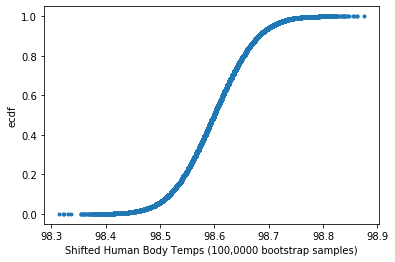

In [11]:
#generate 100,000 bs replicates of the mean and plot the ecdf
bs_shifted = gen_bs_reps(shifted_temps, np.mean, 100000)
bs_xs, bs_ys = ecdf(bs_shifted)
plt.plot(bs_xs, bs_ys, marker=".", linestyle="none")
plt.xlabel("Shifted Human Body Temps (100,0000 bootstrap samples)")
plt.ylabel("ecdf")
plt.show()

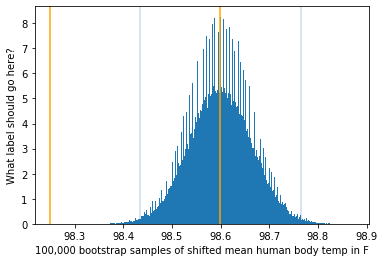

In [15]:
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(bs_shifted))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# drawing the plot
plt.hist(bs_shifted, bins=n_bins, density=True)
_ = plt.axvline(mu, c="orange") #mu is the original mean
_ = plt.axvline(np.mean(bs_shifted), c="orange")
_ = plt.axvline(np.percentile(bs_shifted, 99.5), alpha = .25)
_ = plt.axvline(np.percentile(bs_shifted, .5), alpha = .25)

plt.xlabel("100,000 bootstrap samples of shifted mean human body temp in F")
plt.ylabel("What label should go here?")
plt.show()

In [29]:
#calculate the 99% CI
print("99% confidence interval", np.percentile(bs_shifted, [.5, 99.5]))

#calculate the p value
p = np.sum(bs_shifted <= mu)/ len(bs_shifted)
print("The p-value for our 100,000 replicates is", p)

99% confidence interval [98.43384615 98.76461538]
The p-value for our 100,000 replicates is 0.0


## Conclusion of bootstrap hypothesis test
The bootstrap sample distribution for the means of the shifted data (with mean shifted to 98.6) is not likely include the original mean of 98.2 degrees.

We reject Ho that the true population mean is 98.6 degrees.

## Question 3 continued
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

* What's frequentist statistical testing?
* One sample testing should be used, because we are comparing a sample mean with a hypothetically known mean.
* When a t-test is used on larger samples, it becomes very similar to a z-test.


In [34]:
# t-test: original temps vs a mean of 98.6
ttest_1samp(t, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [35]:
# t-test: shifted temps (with mean of 98.6) vs original mean (98.2)
ttest_1samp(shifted_temps, mu)

Ttest_1sampResult(statistic=5.454823292364741, pvalue=2.410632041553703e-07)

In [36]:
# t-test: original temps vs original mean
ttest_1samp(t, mu)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## Question 4
Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

## Question 5
At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

## Question 6
Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.